In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
import numpy as np

# Set the working directory to the src folder
os.chdir('/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data')


In [17]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_demographic_distribution(group, df, title, column="Age", color = 'skyblue', bins=30, figsize=(10, 6)):
    """
    Plots an improved histogram with a kernel density estimate for the specified column
    in a style consistent with unified quality score visualizations.

    Parameters:
    - df: Pandas DataFrame.
    - column: str, default "Age"
        The column name to be used for the histogram.
    - bins: int, default 30
        The number of bins to use for the histogram.
    - figsize: tuple, default (10, 6)
        The dimensions for the figure size.
    """
    # Set the aesthetic style of the plots
    sns.set_style("whitegrid")

    plt.figure(figsize=figsize)  # Set figure size
    # Histogram with KDE in the chosen colors and style

    if group == 'children':

        age_bins = [1, 4, 7, 10, 13, 16]  # adding one more bin for 16-18
        age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']
        df['Age Group'] = pd.cut(df[column], bins=age_bins, labels=age_labels, right=False)

        ax = sns.histplot(data=df, x='Age Group', bins=age_bins, color=color, kde=False, label=title)
        # ax = sns.countplot(data=df, x='Age Group', palette='coolwarm')


        plt.title(f"{column} Distribution - {title}")  # Dynamic title based on the column name
        plt.xlabel("Age Group")  # Label for the x-axis
        plt.ylabel("Count")  # Label for the y-axis
        plt.xticks(rotation=-45)  # Rotate x-axis labels
        plt.legend()  # Display legend
        plt.grid(True)  # Enable grid lines for a whitegrid look
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 5), textcoords='offset points', color='grey')
    else:
        # age_bins = [1, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
        # age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15', '16-18']
        # df['Age Group'] = pd.cut(df[column], bins=age_bins, labels=age_labels, right=False)

        ax = sns.histplot(data=df, x=column, bins=bins, color=color, kde=False, label=title)
        # ax = sns.countplot(data=df, x='Age Group', palette='coolwarm')


        plt.title(f"{column} Distribution - {title}")  # Dynamic title based on the column name
        plt.xlabel(column)  # Label for the x-axis
        plt.ylabel("Count")  # Label for the y-axis
        plt.xticks(rotation=-45)  # Rotate x-axis labels
        plt.legend()  # Display legend
        plt.grid(True)  # Enable grid lines for a whitegrid look
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 5), textcoords='offset points', color='grey')
    # Improve the layout and show the plot
    plt.tight_layout()
    plt.show()


def plot_age_group_distribution_mated(df, title, figsize=(11, 7)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [1, 4, 7, 10, 13, 16]  # adding one more bin for 16-18
    age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}


    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    # ax = sns.countplot(data=df, x='Age Group', hue='Mated', palette='coolwarm')
    ax = sns.countplot(data=df, x='Age Group', hue='Enrolled', palette=enrolled_palette, alpha = 0.6)

    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df


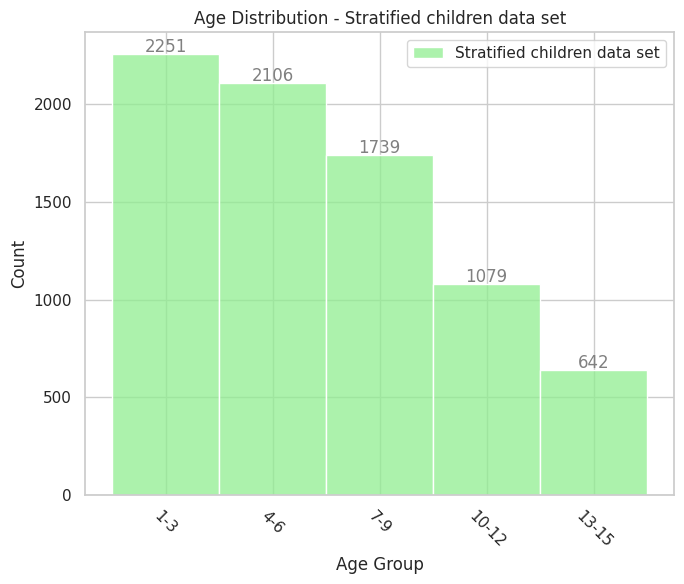

In [10]:
import sys
sys.path.insert(0, '../utils')
from Data_proc_utils.Data_proc_funcs import *

random_states = [1,2]
children_all = pd.read_csv('../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_balanced_df_1 = balance_child_data(children_all, print_stats=False, random_state=random_states[1])

adults_all = pd.read_csv('../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_balanced_df_1 = balance_adults_data_enrolled(children_balanced_df_1, adults_all, print_stats=False, random_state=random_states[0])



plot_demographic_distribution('children', children_all[children_all.Age <= 18], 'Stratified children data set', column="Age",color='lightgreen', bins=6, figsize=(7, 6))

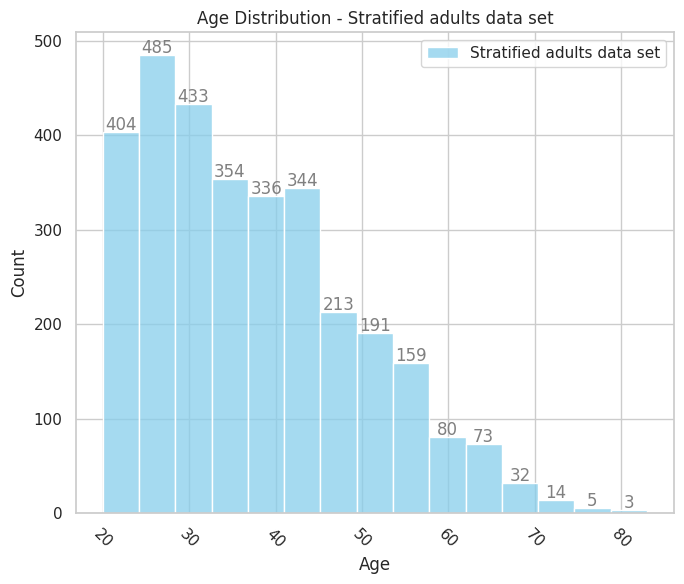

In [11]:

plot_demographic_distribution('adults', adults_balanced_df_1,'Stratified adults data set', column="Age",color='skyblue', bins=15,  figsize=(7, 6))

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_ethnicity_distribution(df1, df2, title1, title2, title_all):
    sns.set_style("whitegrid")

    # Combining and sorting ethnicities
    all_ethnicities = pd.concat([df1['ethnicity'], df2['ethnicity']]).unique()
    all_ethnicities.sort()

    # Prepare data
    df1_counts = df1['ethnicity'].value_counts().reindex(all_ethnicities, fill_value=0).reset_index()
    df1_counts.columns = ['ethnicity', 'count']
    df2_counts = df2['ethnicity'].value_counts().reindex(all_ethnicities, fill_value=0).reset_index()
    df2_counts.columns = ['ethnicity', 'count']

    # Plot setup
    plt.figure(figsize=(10, 6))
    width = 0.35  # Width of the bars

    # Plotting
    x = np.arange(len(all_ethnicities))  # the label locations
    plt.bar(x - width/2, df1_counts['count'], width, label=title1, color='lightgreen', alpha=0.6)
    plt.bar(x + width/2, df2_counts['count'], width, label=title2, color='skyblue', alpha=0.6)

    # Labels, title and custom x-axis tick labels
    plt.ylabel('Image count')
    plt.title(f'Combined Ethnicity Distribution - {title_all}')
    plt.xticks(x, all_ethnicities, rotation=45)
    plt.xlabel('Ethnicity')

    # Adding a legend
    plt.legend(title="Dataset")

    plt.show()


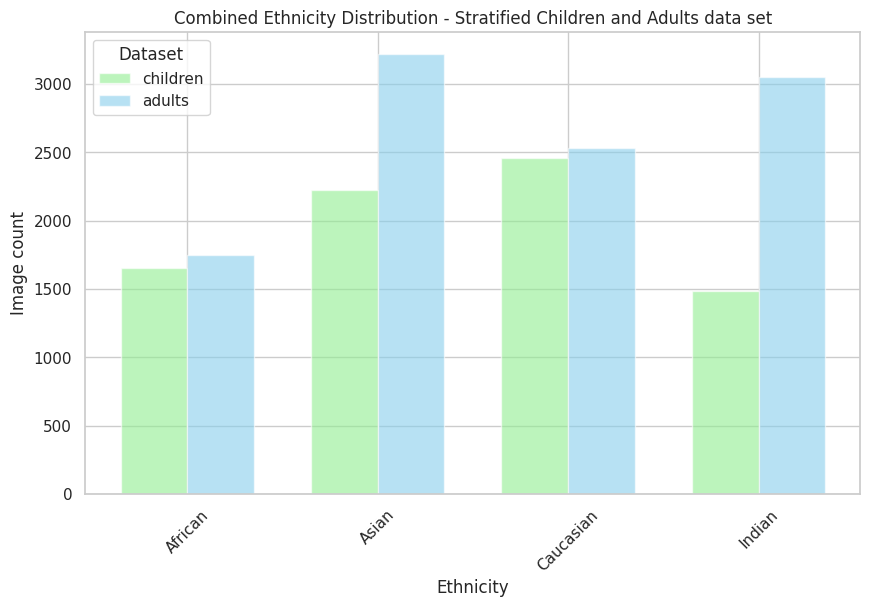

In [18]:
plot_combined_ethnicity_distribution(children_all, adults_all, 'children', 'adults', 'Stratified Children and Adults data set')

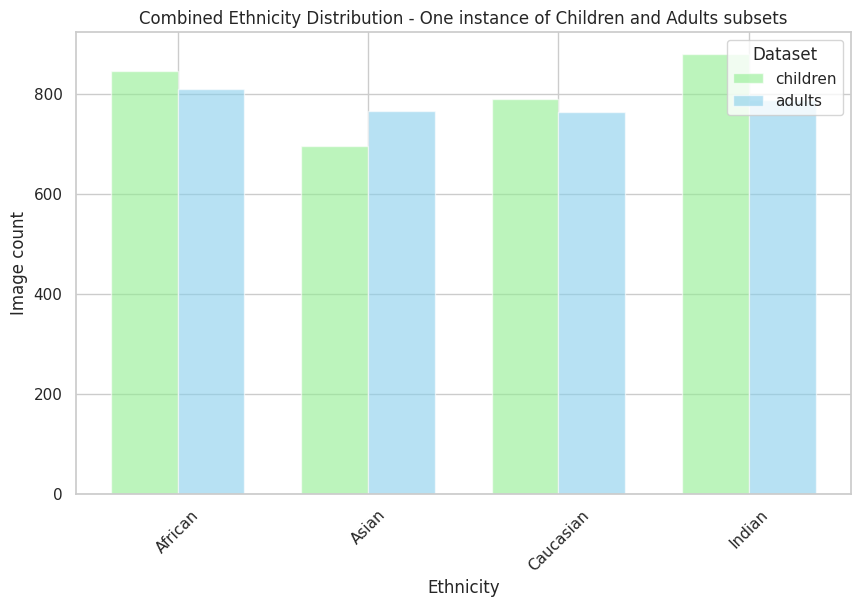

In [14]:
plot_combined_ethnicity_distribution(children_balanced_df_1, adults_balanced_df_1, 'children', 'adults', 'One instance of Children and Adults subsets')

In [19]:
# Mated and non-mated ids ###OBS
c_df = children_balanced_df_1
c_mates = c_df.groupby("identity_name").agg({'identity_name': ['count']})
c_mated_ids = c_mates[c_mates[('identity_name', 'count')] > 1].index


children_balanced_df_1['Enrolled'] = np.where(children_balanced_df_1['identity_name'].isin(c_mated_ids), 'Enrolled', 'Non-enrolled')


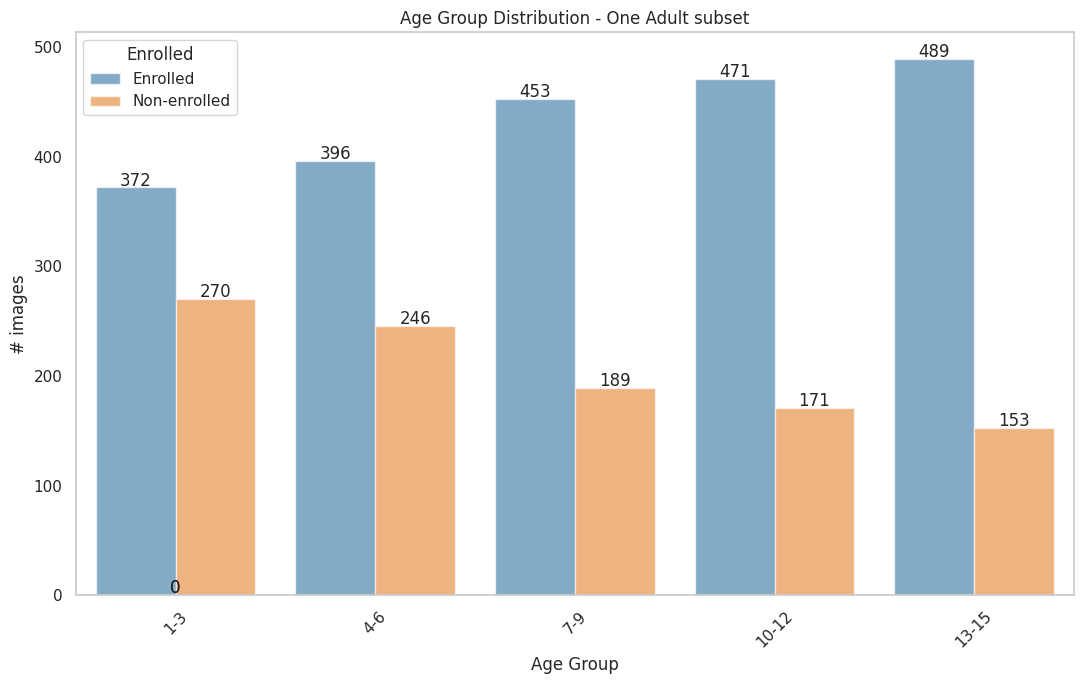

,Unnamed: 0,files_list,image_name,enrolled,identity_name,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup,Enrolled,Age Group
0,10,African_109/African_109_3.png,African_109_3,enrolled,African_109,African,13,African_109,10.0,100.0,78.0,100.0,13-15,Enrolled,13-15
1,16,African_113/African_113_0.png,African_113_0,enrolled,African_113,African,15,African_113,11.0,98.0,68.0,100.0,13-15,Enrolled,13-15
2,34,African_119/African_119_14.png,African_119_14,enrolled,African_119,African,15,African_119,15.0,100.0,96.0,100.0,13-15,Enrolled,13-15
3,48,African_121/African_121_2.png,African_121_2,enrolled,African_121,African,13,African_121,8.0,84.0,100.0,100.0,13-15,Enrolled,13-15
4,55,African_127/African_127_6.png,African_127_6,enrolled,African_127,African,15,African_127,21.0,100.0,80.0,100.0,13-15,Non-enrolled,13-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,6584,Indian_501/Indian_501_5.png,Indian_501_5,enrolled,Indian_501,Indian,11,Indian_501,30.0,99.0,98.0,100.0,10-12,Enrolled,10-12
3206,7461,Indian_337/Indian_337_0.png,Indian_337_0,non_enrolled,Indian_337,Indian,10,Indian_337,25.0,99.0,98.0,100.0,10-12,Non-enrolled,10-12
3207,7086,Indian_m.04y88mr/m.04y88mr_0003.jpg,m.04y88mr_0003,enrolled,m.04y88mr,Indian,12,m.04y88mr,15.0,93.0,100.0,100.0,10-12,Non-enrolled,10-12
3208,7787,Indian_m.05mzg5y/m.05mzg5y_0002.jpg,m.05mzg5y_0002,enrolled,m.05mzg5y,Indian,10,m.05mzg5y,72.0,88.0,99.0,100.0,10-12,Enrolled,10-12


In [20]:
plot_age_group_distribution_mated(children_balanced_df_1, 'One Adult subset')
